In [1]:
import pandas as pd
import numpy as np

### 1. Handle missing data

In [2]:
# read the csv file


df = pd.read_csv("yearly_sales_2024_2.csv")
df

,SaleID,CustomerID,Product,Quantity,Price,SaleDate
0,1,CUST043,Mouse,5.0,15.0,07-03-2024
1,2,CUST039,RAM (16GB),4.0,70.0,29-01-2024
2,3,CUST016,External HDD,3.0,90.0,18-06-2024
3,4,CUST023,Printer,4.0,120.0,08-11-2024
4,5,CUST047,Laptop,5.0,750.0,21-09-2024
...,...,...,...,...,...,...
495,496,CUST016,Laptop,5.0,750.0,09-09-2024
496,497,CUST004,External HDD,1.0,90.0,08-09-2024
497,498,CUST044,Webcam,5.0,35.0,04-03-2024
498,499,CUST030,NaN,3.0,220.0,27-10-2024


In [3]:
# get all the rows with missing values, Quantity and Price


missing_data = df[(df["Quantity"].isna()) | (df["Price"].isna())]
missing_data

,SaleID,CustomerID,Product,Quantity,Price,SaleDate
31,32,CUST028,Webcam,NaN,35.0,14-06-2024
57,58,CUST050,Monitor,NaN,200.0,12-03-2024
120,121,CUST014,Webcam,5.0,NaN,15-09-2024
148,149,CUST009,Router,1.0,NaN,04-01-2024
196,197,CUST009,Smartwatch,3.0,NaN,04-02-2024
229,230,CUST045,Laptop Bag,NaN,40.0,17-07-2024
241,242,CUST049,Graphics Card,1.0,NaN,22-04-2024
305,306,CUST024,Headphones,3.0,NaN,22-12-2024
323,324,CUST013,RAM (16GB),4.0,NaN,05-05-2024
467,468,CUST030,Webcam,1.0,NaN,27-04-2024


In [4]:
# Get product names from missing data


for idx, row in missing_data.iterrows():
    product = row["Product"]
    print(product)

Webcam
Monitor
Webcam
Router
Smartwatch
Laptop Bag
Graphics Card
Headphones
RAM (16GB)
Webcam


In [5]:
# Update quantity of missing products based on price


for idx, row in missing_data.iterrows():
    product = row["Product"]
    # print(product)
    unit_price_series = df.loc[(df["Product"] == product) & (df["Price"].notna()), "Price"]
    # print(unit_price_series)
    if not unit_price_series.empty:
        unit_price = unit_price_series.iloc[0]
        if pd.isna(row["Quantity"]) and pd.notna(row["Price"]):
            df.at[idx, "Quantity"] = row["Price"] / unit_price

In [6]:
# Check for empty quantity column in missing values, they must be filled


df[(df["Quantity"].isna()) | (df["Price"].isna())]

,SaleID,CustomerID,Product,Quantity,Price,SaleDate
120,121,CUST014,Webcam,5.0,NaN,15-09-2024
148,149,CUST009,Router,1.0,NaN,04-01-2024
196,197,CUST009,Smartwatch,3.0,NaN,04-02-2024
241,242,CUST049,Graphics Card,1.0,NaN,22-04-2024
305,306,CUST024,Headphones,3.0,NaN,22-12-2024
323,324,CUST013,RAM (16GB),4.0,NaN,05-05-2024
467,468,CUST030,Webcam,1.0,NaN,27-04-2024


In [7]:
# Similarly update the price column based on quantity


for idx, row in missing_data.iterrows():
    product = row["Product"]
    # print(product)
    unit_price_series = df.loc[(df["Product"] == product) & (df["Price"].notna()), "Price"]
    # print(unit_price_series)
    if not unit_price_series.empty:
        unit_price = unit_price_series.iloc[0]
        if pd.notna(row["Quantity"]) and pd.isna(row["Price"]):
            df.at[idx, "Price"] = row["Quantity"] * unit_price

In [8]:
# Check for price column in missing data, they are filled too


df[(df["Quantity"].isna()) | (df["Price"].isna())]

,SaleID,CustomerID,Product,Quantity,Price,SaleDate


---

### For now, missing values of quantity and price are handled using the existing data

---

### 2. Create a new column Total sales

In [9]:
df["Total_Sales"] = df["Quantity"] * df["Price"]
df

,SaleID,CustomerID,Product,Quantity,Price,SaleDate,Total_Sales
0,1,CUST043,Mouse,5.0,15.0,07-03-2024,75.0
1,2,CUST039,RAM (16GB),4.0,70.0,29-01-2024,280.0
2,3,CUST016,External HDD,3.0,90.0,18-06-2024,270.0
3,4,CUST023,Printer,4.0,120.0,08-11-2024,480.0
4,5,CUST047,Laptop,5.0,750.0,21-09-2024,3750.0
...,...,...,...,...,...,...,...
495,496,CUST016,Laptop,5.0,750.0,09-09-2024,3750.0
496,497,CUST004,External HDD,1.0,90.0,08-09-2024,90.0
497,498,CUST044,Webcam,5.0,35.0,04-03-2024,175.0
498,499,CUST030,NaN,3.0,220.0,27-10-2024,660.0


---

### Group by

In [10]:
total_revenue_by_product = df.groupby("Product")["Total_Sales"].sum().reset_index()
total_revenue_by_product

,Product,Total_Sales
0,CPU,21700.0
1,Desk Chair,12780.0
2,External HDD,4680.0
3,Gaming Chair,16940.0
4,Graphics Card,24400.0
5,Headphones,2950.0
6,Keyboard,1425.0
7,Laptop,39750.0
8,Laptop Bag,2840.0
9,Microphone,2585.0


---

### Monthly Sales

In [11]:
df["SaleDate"] = pd.to_datetime(df["SaleDate"],  dayfirst=True)
monthly_sales = (
    df.groupby(df["SaleDate"].dt.to_period("M"))["Total_Sales"].sum().reset_index().rename(columns={"SaleDate": "Month"})
)
monthly_sales

,Month,Total_Sales
0,2024-01,17205.0
1,2024-02,22615.0
2,2024-03,38155.0
3,2024-04,26690.0
4,2024-05,17325.0
5,2024-06,19155.0
6,2024-07,29465.0
7,2024-08,21260.0
8,2024-09,27810.0
9,2024-10,18375.0


# Part D

In [12]:
import matplotlib.pyplot as plt

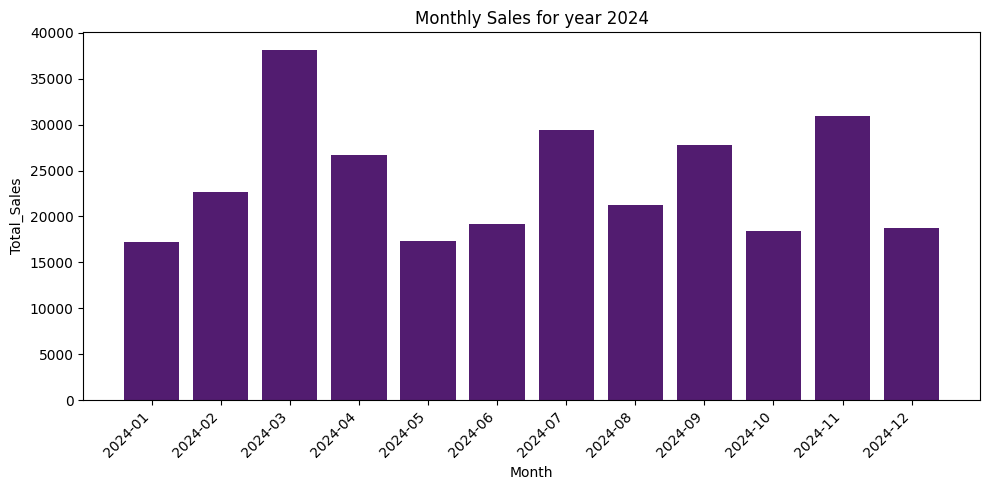

In [13]:
monthly_sales["Month"] = monthly_sales["Month"].astype(str)
plt.figure(figsize=(10, 5))
plt.bar(monthly_sales["Month"], monthly_sales["Total_Sales"], color="#521C70")
plt.xlabel("Month")
plt.ylabel("Total_Sales")
plt.title("Monthly Sales for year 2024")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

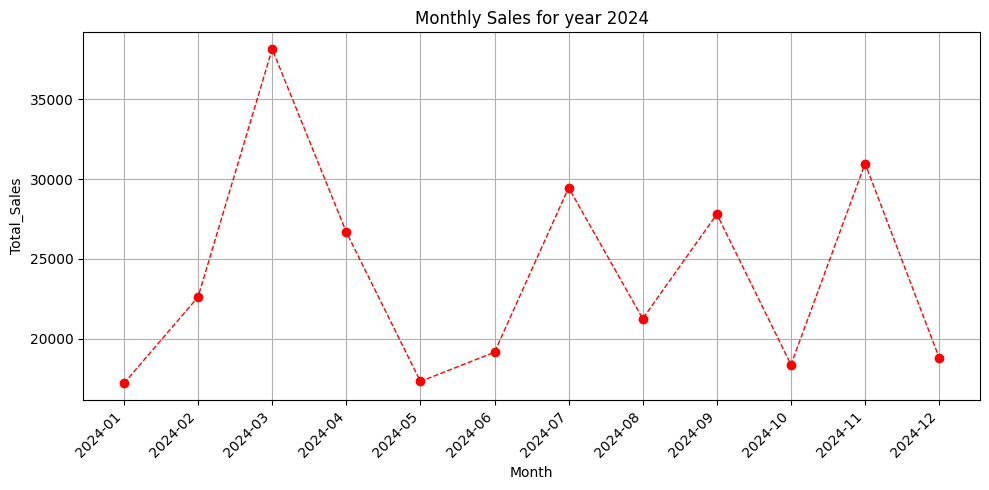

In [14]:
monthly_sales["Month"] = monthly_sales["Month"].astype(str)
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["Month"], monthly_sales["Total_Sales"], marker="o", linestyle='--', color="red", linewidth=1)
plt.xlabel("Month")
plt.ylabel("Total_Sales")
plt.title("Monthly Sales for year 2024")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

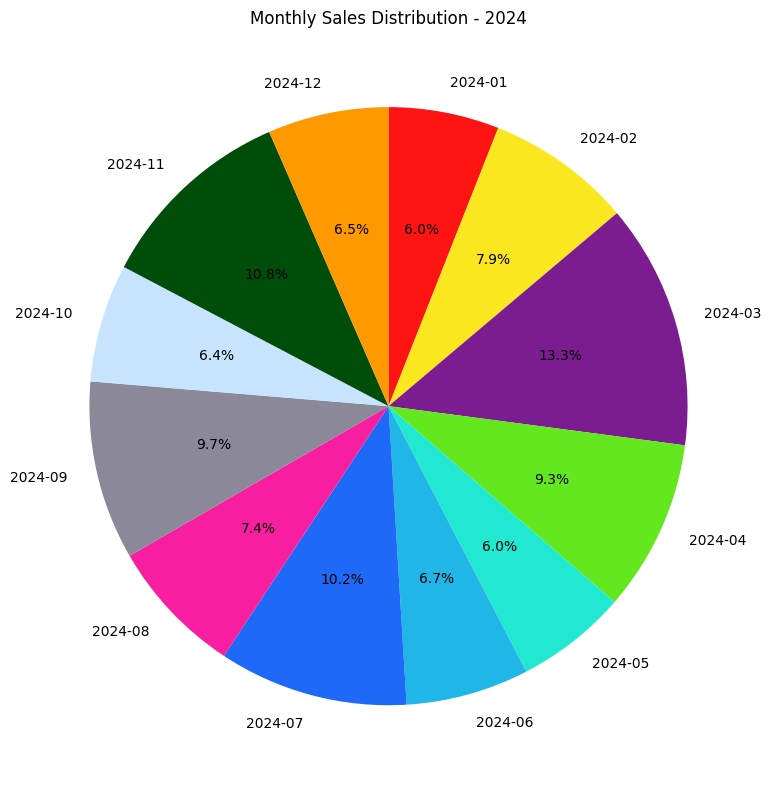

In [15]:
monthly_sales["Month"] = monthly_sales["Month"].astype(str)
plt.figure(figsize=(8, 8))
custom_colors = ["#FF1414", "#FAE720", "#7B1D91", "#63E820", "#20E8D1", "#20B6E8", "#1E69F7", "#F71EA0", "#8B8899", "#C7E4FF", "#004D0A", "#FF9900"]
plt.pie(monthly_sales["Total_Sales"], labels = monthly_sales["Month"], autopct="%1.1f%%", startangle=90, counterclock=False, colors=custom_colors)
plt.title("Monthly Sales Distribution - 2024")
plt.tight_layout()
plt.show()

In [16]:
total_product = df.groupby("Product")["Quantity"].sum().reset_index()
total_product

,Product,Quantity
0,CPU,62.0
1,Desk Chair,71.0
2,External HDD,52.0
3,Gaming Chair,77.0
4,Graphics Card,61.0
5,Headphones,53.0
6,Keyboard,57.0
7,Laptop,53.0
8,Laptop Bag,71.0
9,Microphone,47.0


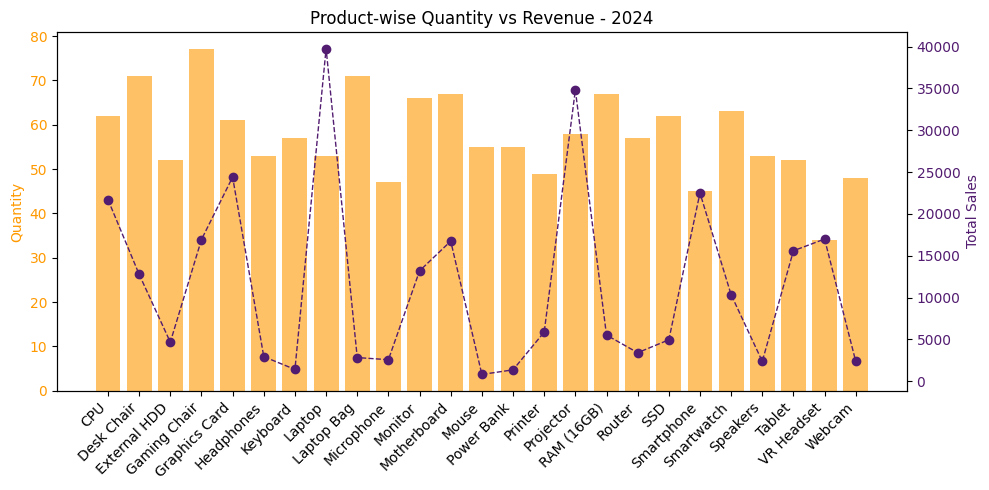

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Primary axis - Product Quantity (bar)
ax1.bar(total_product["Product"], total_product["Quantity"], color="#FF9900", alpha=0.6, label="Quantity")
ax1.set_ylabel("Quantity", color="#FF9900")
ax1.tick_params(axis="y", labelcolor="#FF9900")
ax1.set_xticks(np.arange(len(total_product["Product"])))
ax1.set_xticklabels(total_product["Product"], rotation=45, ha="right")

# Secondary axis - Total Sales (line)
ax2 = ax1.twinx()
ax2.plot(total_revenue_by_product["Product"], total_revenue_by_product["Total_Sales"],
         marker="o", color="#521C70", linewidth=1, label="Revenue", linestyle='--')
ax2.set_ylabel("Total Sales", color="#521C70")
ax2.tick_params(axis="y", labelcolor="#521C70")

# Formatting
plt.title("Product-wise Quantity vs Revenue - 2024")
fig.tight_layout()
plt.show()